# 01. Load packages

In [2]:
import os
from collections import Counter
import random

from tqdm import tqdm

import pandas as pds
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sbn

df = pds.read_csv(os.path.join('../files/Week 08. data-mushroom.csv'), delimiter=';').fillna('NAN')

df.iloc[:,0].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NAN,w,16.95,...,s,y,w,u,w,t,g,NAN,d,w
1,p,16.60,x,g,o,f,e,NAN,w,17.99,...,s,y,w,u,w,t,g,NAN,d,u
2,p,14.07,x,g,o,f,e,NAN,w,17.80,...,s,y,w,u,w,t,g,NAN,d,w
3,p,14.17,f,h,e,f,e,NAN,w,15.77,...,s,y,w,u,w,t,p,NAN,d,w
4,p,14.64,x,h,o,f,e,NAN,w,16.53,...,s,y,w,u,w,t,p,NAN,d,w


In [4]:
df['y'] = df['class']
del df['class']
df['y'] = df['y'].apply(lambda x: 1 if x == 'p'  else 0)

In [5]:
n_samples = 200
test_df = pds.concat(
    [
        df.query('y == 0').iloc[n_samples:n_samples*2],
        df.query('y == 1').iloc[n_samples:n_samples*2]
    ]
).reset_index(drop = True)
        

In [6]:
train_df = pds.concat(
    [
        df.query('y == 0').iloc[:n_samples],
        df.query('y == 1').iloc[:n_samples]
    ]
).reset_index(drop = True)
        

In [7]:
test_df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,y
0,9.29,x,NAN,n,t,NAN,NAN,w,10.11,16.68,...,NAN,w,u,w,t,g,NAN,d,u,0
1,10.12,x,NAN,n,t,NAN,NAN,w,9.83,16.28,...,NAN,w,u,w,t,g,NAN,d,a,0
2,7.42,f,NAN,n,t,NAN,NAN,w,8.41,15.31,...,NAN,w,u,w,t,g,NAN,d,u,0
3,12.27,x,NAN,n,t,NAN,NAN,w,12.05,19.35,...,NAN,w,u,w,t,g,NAN,d,a,0
4,12.45,x,NAN,n,t,NAN,NAN,w,11.33,16.75,...,NAN,w,u,w,t,g,NAN,d,u,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7.19,x,g,n,f,e,NAN,w,7.24,17.20,...,y,w,u,w,t,p,NAN,d,a,1
396,7.07,x,g,n,f,e,NAN,w,8.82,18.08,...,y,w,u,w,t,p,NAN,d,a,1
397,7.81,x,g,n,f,e,NAN,w,8.12,14.57,...,y,w,u,w,t,p,NAN,d,a,1
398,6.08,x,g,n,f,e,NAN,w,7.71,14.72,...,y,w,u,w,t,p,NAN,d,a,1


In [8]:
train_df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,y
0,10.42,f,NAN,n,t,NAN,NAN,w,11.50,17.75,...,NAN,w,u,w,t,g,NAN,d,a,0
1,9.59,f,NAN,n,t,NAN,NAN,w,9.87,14.71,...,NAN,w,u,w,t,g,NAN,d,u,0
2,9.10,f,NAN,n,t,NAN,NAN,w,11.45,20.24,...,NAN,w,u,w,t,g,NAN,d,a,0
3,8.86,x,NAN,n,t,NAN,NAN,w,11.25,14.37,...,NAN,w,u,w,t,g,NAN,d,u,0
4,9.59,x,NAN,n,t,NAN,NAN,w,7.82,15.06,...,NAN,w,u,w,t,g,NAN,d,u,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15.50,x,g,e,f,e,NAN,w,17.83,18.79,...,y,w,u,w,t,g,NAN,d,u,1
396,14.77,x,h,e,f,e,NAN,w,16.72,16.51,...,y,w,u,w,t,p,NAN,d,a,1
397,18.14,x,g,o,f,e,NAN,w,18.49,19.13,...,y,w,u,w,t,p,NAN,d,u,1
398,15.78,x,h,o,f,e,NAN,w,18.71,18.83,...,y,w,u,w,t,g,NAN,d,w,1


# 02. Python interior Lib. Counter

In [9]:
Counter(train_df.query('y==1').y)

Counter({1: 200})

In [10]:
Counter(train_df.query('y==1').y)[0]

0

In [11]:
Counter(train_df.query('y==1').y)[1]

200

In [12]:
Counter(train_df.query('y==1').y)[2]

0

# 03. Decision Tree



<figure>
    <img 
       src="https://forum.huawei.com/enterprise/en/data/attachment/forum/202103/24/190400o09x7rhnnhy2yon7.png?1.png" 
       width="700">
</figure>
<center><b>Example of the Decision Tree</b></center>


## 03 - 0. The component of the DT

<img src = https://imgur.com/Xd6ULKk.png width = 700>

# 03 - 1. Threshold

Decision tree의 분기를 생성하기 위한 threshold를 탐색합니다. 

Threshold를 위해 결정해야 할 것은 변수와 변수의 종류 및 변수에 존재하는 값입니다. 

Data type에 따라서 threhold를 다르게 다루기 때문에 type을 고려한 threshold를 탐색합니다.

In [13]:
train_df.dtypes

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
y                         int64
dtype: object

In [14]:
def find_unique_value(df):
    unique_lists = []
    for c, t in df.dtypes.iloc[:-1].items():
        unique_lists += [[c, t, n] for n in df[c].unique()]
    return unique_lists

def det_type(t):
    if ('float' in str(t)) or ('int' in str(t)):
        return 'numerical'
    else:
        return 'categorical'

In [15]:
unique_values = find_unique_value(train_df)

In [16]:
c,t,thr = unique_values[-10]

In [17]:
t, det_type(t)

(dtype('O'), 'categorical')

# 03 - 2. Imputrity
<img src = https://imgur.com/tlixzBM.png width = 600>

Decision tree를 위해 아래 두 가지 impurity 계산 방법을 활용하겠습니다.  

</br>
</br>
<center>$$ Gini(Y) = 1 - \sum_{C\in Y}^{c}\left(\frac{\# \ of\ Y(c)}{\# \ of\ Y}\right)^2$$</center>

<center>$$ Entropy(Y) = - \sum_{C\in Y}^{c}P(Y|c)\log{P(Y|c)}$$</center>


In [18]:
def total_imp(c, t, thr):
    
    if det_type(t) == 'numerical':
        left_idx = df.loc[df[c] <= thr].index
        right_idx = df.loc[df[c] > thr].index

    else:
        left_idx = df.loc[df[c] == thr].index
        right_idx = df.loc[df[c] != thr].index
        
    left_proportion = len(left_idx) / (len(right_idx) + len(left_idx))
    left_imp = gini_index(df.loc[left_idx]) * left_proportion

    right_proportion = 1 - left_proportion
    right_imp = gini_index(df.loc[right_idx]) * right_proportion

    return left_imp, right_imp, left_proportion, right_proportion


def gini_index(df):

    n_samples = len(df)
    if n_samples == 0:
        return n_samples
    C = Counter(df.y)
    return 1 - ((C[0] / n_samples) ** 2 + (C[1] / n_samples) ** 2 )


In [19]:
random.shuffle(unique_values)
total_imp(*unique_values[0])

(0.3808289707391205,
 0.10058485844055674,
 0.7906138957572582,
 0.20938610424274184)

In [20]:
def thr_find(df, unique_values, root_imp = np.inf):
    random.shuffle(unique_values)
    for params in unique_values:
        left_imp, right_imp, left_proportion, right_proportion = total_imp(*params)
        node_imp = left_imp + right_imp

        if node_imp < root_imp:
            return *params, left_imp, right_imp, node_imp

In [21]:
thr_find(train_df, unique_values)

('stem-width',
 dtype('float64'),
 15.77,
 0.3461717702512205,
 0.13360044357529005,
 0.47977221382651053)

# 03 - 3. Growing leaf node

<img src = https://imgur.com/94T5Bbn.png width = 700>

Decision tree의 각 node 별 leaf node의 생성 여부는 information gain에 의해 결정됩니다. 

만약 각 node의 criteria가 leaf node를 생성함으로 인해서 줄어든 criteria보다 작아지지 않는다면 더이상 node를 생성할 필요가 없게 됩니다. 

때문에, decision tree의 최대 깊이는 제어할 수 없는 요소이므로, 주로 DT의 node 생성을 위해 recursive function을 활용합니다. 

In [22]:
class Node:
    def __init__(self, df):
        
        self.df = df
        
        self.unique_values = self.find_unique_value()

        self.root_imp = self.gini_index(self.df)
        self.left_node, self.right_node = self.divide()
        
        self.max_depth = max(self.node_depth([]))
        
    
    def find_unique_value(self):
        unique_lists = []
        for c, t in self.df.dtypes.iloc[:-1].items():
            unique_lists += [[c, t, n] for n in self.df[c].unique()]
        return unique_lists

    
    @staticmethod
    def det_type(t):
        if ('float' in str(t)) or ('int' in str(t)):
            return 'N'
        else:
            return 'C'
        
        
    @staticmethod
    def gini_index(sub_df):
        
        n_samples = len(sub_df)
        if n_samples == 0:
            return n_samples
        C = Counter(sub_df.y)
        return 1 - ((C[0] / n_samples) ** 2 + (C[1] / n_samples) ** 2 )

    
    def total_imp(self, c, t, thr):

        if t == 'N':
            left_idx = self.df.loc[self.df[c] <= thr].index
            right_idx = self.df.loc[self.df[c] > thr].index
        else:
            left_idx = self.df.loc[self.df[c] == thr].index
            right_idx = self.df.loc[self.df[c] != thr].index
            
        left_proportion = len(left_idx) / (len(right_idx) + len(left_idx))
        left_imp = left_proportion * self.gini_index(self.df.loc[left_idx])

        right_proportion = len(right_idx) / (len(right_idx) + len(left_idx))
        right_imp = right_proportion * self.gini_index(self.df.loc[right_idx])

        return left_imp, right_imp, left_proportion, right_proportion

    
    def thr_find(self):

        random.shuffle(self.unique_values)
        for c, t, thr in self.unique_values:

            left_imp, right_imp, left_proportion, right_proportion = self.total_imp(c, t, thr)
            node_imp = left_imp + right_imp
            
            if node_imp < self.root_imp:
                self.left_proportion, self.right_proportion = left_proportion, right_proportion
                return c, t, thr, left_imp, right_imp, node_imp
            

    def divide(self):
        
        if self.root_imp == 0.:
            return self.df.y.unique()[0]
        
        params = self.thr_find()
        
        self.c, self.t, self.thr, self.left_imp, self.right_imp, self.node_imp = params
        
        if self.t == 'N':
            left_idx = self.df.loc[self.df[self.c] <= self.thr].index
            right_idx = self.df.loc[self.df[self.c] > self.thr].index
        else:
            left_idx = self.df.loc[self.df[self.c] == self.thr].index
            right_idx = self.df.loc[self.df[self.c] != self.thr].index
        
        self.left_df = self.df.loc[left_idx]
        self.right_df = self.df.loc[right_idx]
            
            
        if (self.left_imp == 0.) and (self.right_imp == 0.):
            return self.left_df.y.unique()[0], self.right_df.y.unique()[0]
        
        elif (self.left_imp != 0.) and (self.right_imp == 0.):
            return Node(self.left_df), self.right_df.y.unique()[0]
        
        elif (self.left_imp == 0.) and (self.right_imp != 0.):
            return self.left_df.y.unique()[0], Node(self.right_df)
        
        else:
            return Node(self.left_df), Node(self.right_df)
    
    
    @staticmethod
    def predict_node(node, sample):
        if type(node) != np.int64:
            return node.predict(sample)
        return node
    
    
    def predict(self, sample_x):
        
        self.sample_x = sample_x
        if self.t == 'numerical':
            if sample_x[self.c] > self.thr:
                return self.predict_node(self.right_node, sample_x)
            else:
                return self.predict_node(self.left_node, sample_x)

        else:
            if sample_x[self.c] != self.thr:
                return self.predict_node(self.right_node, sample_x)
            else:
                return self.predict_node(self.left_node, sample_x)

    
    def node_depth(self, lists = [], depth = 0):
        
        
        depth += 1
        
        if (type(self.left_node) == np.int64) and (type(self.right_node) == np.int64):
            lists.append(depth)
        
        elif (type(self.left_node) != np.int64) and (type(self.right_node) == np.int64):
            lists = self.left_node.node_depth(lists, depth)
        
        elif (type(self.left_node) == np.int64) and (type(self.right_node) != np.int64):
            lists = self.right_node.node_depth(lists, depth)
        
        else:
            lists = self.left_node.node_depth(lists, depth)
            lists = self.right_node.node_depth(lists, depth)
            
        return lists
    

In [23]:
node = Node(train_df)

TypeError: data type 'N' not understood

In [ ]:
node.max_depth

80

In [ ]:
logits = test_df.apply(lambda x: node.predict(x.iloc[:-1]), axis = 1)

In [ ]:
logits.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import seaborn as sbn
from matplotlib import pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

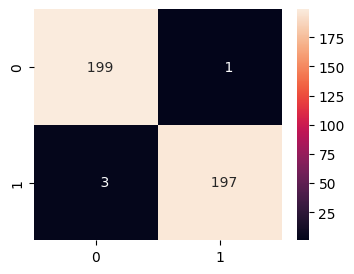

In [ ]:
CM = confusion_matrix(test_df.y.values, logits.values)

fig,ax = plt.subplots(1,1, figsize = (4,3))
sbn.heatmap(CM, annot = CM, ax = ax, fmt = '5g')

# 03. sklearn - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(train_df.iloc[:,:-1], train_df.y)

In [ ]:
from itertools import product
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [ ]:
remove_columns = []
categorical_columns = []
numerical_columns = []

for c, t in df.iloc[:,:-1].iteritems():
    if t.dtype != np.float64:
        n_unique = len(t.unique())
        if n_unique == 1:
            remove_columns.append(c)
        else:
            categorical_columns.append(c)
        
    else:
        numerical_columns.append(c)

In [ ]:
pds.get_dummies(df[categorical_columns])

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_NAN,cap-surface_d,cap-surface_e,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61065,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61066,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61067,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
def transform(df, cs):
    return_list = []
    for c in cs:
        unique_values = {i : n for n,i in enumerate(df[c].unique())}
        num_df = df[c].apply(lambda x: unique_values[x])
        if len(unique_values) == 2:
            return_list.append(num_df.values.reshape(-1,1))
        else:
            return_list.append(np.eye(len(unique_values))[num_df])
            
    return np.concatenate(return_list, 1)

In [ ]:
l = transform(df, categorical_columns)

In [ ]:
features = np.concatenate([
    df[numerical_columns].values,
    l
], 1)

In [ ]:

def ss_kfold_fn(data_x, data_y, scaling = True):
    kf = StratifiedKFold()
    for n, (train_idx, valid_idx) in enumerate(kf.split(data_x, data_y)):
        
        scaler_x = StandardScaler()
        
        if scaling:
            
            train_x = scaler_x.fit_transform(data_x[train_idx])
            valid_x = scaler_x.transform(data_x[valid_idx])
            
        else:
            train_x = data_x[train_idx]
            valid_x = data_x[valid_idx]

        train_y = data_y[train_idx]
        valid_y = data_y[valid_idx]
        
        yield [
            [train_x, train_y],
            [valid_x, valid_y]
        ], (scaler_x)


In [ ]:
g = ss_kfold_fn(features, df.y.values)

In [ ]:
((train_x, train_y), (valid_x, valid_y)), s = next(g)

In [ ]:
Counter(train_y)

Counter({0: 21745, 1: 27110})

In [ ]:
Counter(valid_y)

Counter({1: 6778, 0: 5436})

In [ ]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
logits = dt.predict(valid_x)

<AxesSubplot:>

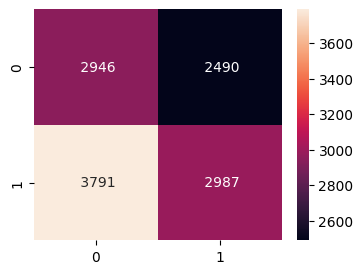

In [ ]:
CM = confusion_matrix(valid_y, logits)

fig,ax = plt.subplots(1,1, figsize = (4,3))
sbn.heatmap(CM, annot = CM, ax = ax, fmt = '5g')